# 逻辑回归

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [0]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [0]:
#定义sigmoid函数
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

def fit(X_train, y_train, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"


    def costfunc(theta, X_b, y):
        # 计算损失函数
        y_hat = sigmoid(X_b.dot(theta))
        try:
            return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
        except:
            return float('inf')

    def dJ(theta, X_b, y):
        # 损失函数求导
        y_hat = sigmoid(X_b.dot(theta))
        return X_b.T.dot(y_hat - y) / len(y)

    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0
        # print('X_b.dot(theta)=',(X_b.dot(theta)).shape)
        # print('(X_b.dot(theta) - y).shape=',(X_b.dot(theta) - y).shape)
        # print('X_b.T.dot(X_b.dot(theta) - y).shape=',X_b.T.dot(X_b.dot(theta) - y).shape)


        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            # print(gradient.shape)
            theta = theta - eta * gradient
            if (abs(costfunc(theta, X_b, y) - costfunc(last_theta, X_b, y)) < epsilon):
                break

            cur_iter += 1

        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    print('X_b.shape=',X_b.shape)
    print('y_train.shape=',y_train.shape)
    initial_theta = np.zeros(X_b.shape[1]) #初始化theta
    print('theta.shape=',initial_theta.shape)
    theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

    intercept_ = theta[0]
    coef_ = theta[1:]

    return theta

In [0]:
def test():
    X, y = create_data()


    weight = fit(X,y)

    x_ponits = np.arange(4, 8)
    y_ = -(weight[1]*x_ponits + weight[0])/weight[2]


    print(weight)

    clf = LogisticRegression(max_iter=200)
    clf.fit(X, y)
    print(clf.intercept_,clf.coef_)

    y_2 = -(clf.coef_[0][0]*x_ponits + clf.intercept_[0])/clf.coef_[0][1]
    plt.plot(x_ponits, y_)
    plt.plot(x_ponits, y_2)
    #lr_clf.show_graph()
    plt.scatter(X[:50,0],X[:50,1], label='0')
    plt.scatter(X[50:,0],X[50:,1], label='1')
    plt.legend()
    plt.show()

X_b.shape= (100, 3)
y_train.shape= (100,)
theta.shape= (3,)
[-0.69327281  3.0414894  -5.09739709]
[-0.58584011] [[ 2.21226733 -3.68263774]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


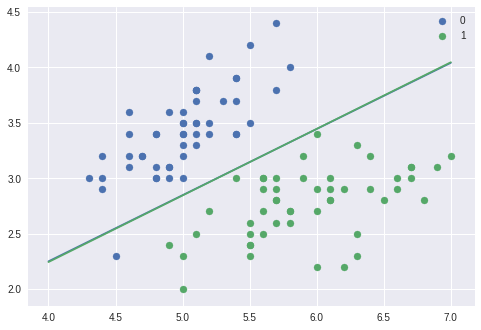

In [0]:
test()

# 带正则化的逻辑回归

In [0]:
def fitlam(X_train, y_train, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"


    def costfunc(theta, X_b, y,lam =1):
        # 计算损失函数
        y_hat = sigmoid(X_b.dot(theta))
        try:
            return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y) \
                     + (lam/(2.0*len(y)))*np.sum(np.square(theta[1:]))
        except:
            return float('inf')

    def dJ(theta, X_b, y,lam=1):
        # 损失函数求导
        y_hat = sigmoid(X_b.dot(theta))
        return X_b.T.dot(y_hat - y) / len(y) + (lam/len(y))*np.r_[[0],theta[1:]]

    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0
        print('X_b.dot(theta)=',(X_b.dot(theta)).shape)
        print('(X_b.dot(theta) - y).shape=',(X_b.dot(theta) - y).shape)
        print('X_b.T.dot(X_b.dot(theta) - y).shape=',X_b.T.dot(X_b.dot(theta) - y).shape)


        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            theta = theta - eta * gradient
            if (abs(costfunc(theta, X_b, y) - costfunc(last_theta, X_b, y)) < epsilon):
                break

            cur_iter += 1

        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    print('X_b.shape=',X_b.shape)
    print('y_train.shape=',y_train.shape)
    initial_theta = np.zeros(X_b.shape[1]) #初始化theta
    print('theta.shape=',initial_theta.shape)
    theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

    intercept_ = theta[0]
    coef_ = theta[1:]

    return theta

In [0]:
def testlam():
    X, y = create_data()

    weight = fit(X,y)

    x_ponits = np.arange(4, 8)
    y_ = -(weight[1]*x_ponits + weight[0])/weight[2]


    print(weight)

    clf = LogisticRegression(
        # max_iter=200,
        C=100)
    clf.fit(X, y)
    print(clf.intercept_,clf.coef_)

    y_2 = -(clf.coef_[0][0]*x_ponits + clf.intercept_[0])/clf.coef_[0][1]

    theta2 = np.array([clf.intercept_[0],clf.coef_[0][0],clf.coef_[0][1]])

    plt.plot(x_ponits, y_,label='ys-lr')
    plt.plot(x_ponits, y_2,label='sklearn')
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.legend()
    plt.show()


X_b.shape= (100, 3)
y_train.shape= (100,)
theta.shape= (3,)
[-0.69327281  3.0414894  -5.09739709]
[-13.22126352] [[ 8.02403511 -9.72926711]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


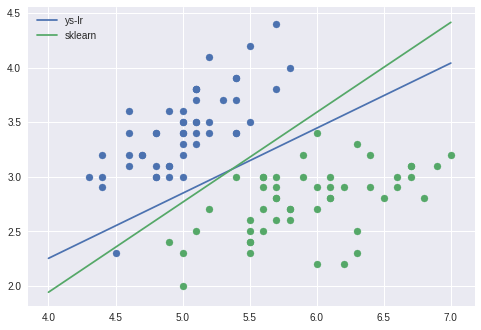

In [0]:
testlam()

# 绘制决策边界

In [0]:
def fitys(X_train, y_train,lam, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"
    

    def costfunc(theta, X_b, y,lam):
        # 计算损失函数
        y_hat = sigmoid(X_b.dot(theta))
        try:
            return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y) \
                     + (lam/(2.0*len(y)))*np.sum(np.square(theta[1:]))
        except:
            return float('inf')

    def dJ(theta, X_b, y,lam):
        # 损失函数求导
        y_hat = sigmoid(X_b.dot(theta))
        return X_b.T.dot(y_hat - y) / len(y) + (lam/len(y))*np.r_[[0],theta[1:]]

    def gradient_descent(X_b, y, initial_theta, lam2,eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0
        
        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y,lam2)
            last_theta = theta
            theta = theta - eta * gradient
            if (abs(costfunc(theta, X_b, y,lam2) - costfunc(last_theta, X_b, y,lam2)) < epsilon):
                break

            cur_iter += 1

        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1]) #初始化theta
    theta = gradient_descent(X_b, y_train,initial_theta,lam ,eta, n_iters)

    intercept_ = theta[0]
    coef_ = theta[1:]
    return theta

In [0]:
def predict(X_predict,theta):

    X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
    proba = sigmoid(X_b.dot(theta))
    return np.array(proba >= 0.5, dtype='int')


In [0]:
data2 = np.loadtxt('data2.txt', delimiter=',')
y = np.array(data2[:,2])
X = np.array(data2[:,0:2])

In [0]:
X.shape

(118, 2)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX = poly.fit_transform(X)

In [0]:
XX.shape

(118, 28)

In [0]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True)

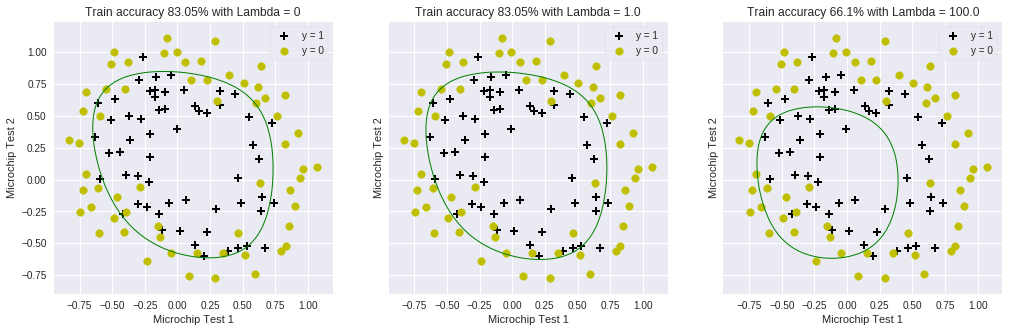

In [61]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    weight = fitys(XX,y,lam=C)
    
    # 准确率
    accuracy = 100.0*sum(predict(XX,weight) == y.ravel())/y.size    

    # 对X,y的散列绘图

    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
#     h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(weight[1:])+weight[0])
    XX2 = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
    X_b = np.hstack([np.ones((len(XX2), 1)), XX2])
    h = sigmoid(X_b.dot(weight))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

# sklearn

In [0]:
clf=LogisticRegression(C=1)

In [0]:
clf.fit(XX, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
clf.score(XX,y)

0.8305084745762712